<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-CIFAR_10/Identification_Objets-ResConv-VariantesArchitectures-CIFAR_10" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Identification d'objets à partir de photos - jeu de données CIFAR-10
## Labo réseau convolutif - variantes d'architecture

#### Inspiration: 


## Jeu de données - photos CIFAR-10
L'ensemble de données CIFAR-10 (Canadian Institute For Advanced Research) comporte 60 000 photographies en couleur de 32×32 pixels d'objets de 10 classes différentes. Il est relativement simple d'atteindre une précision de 80 %. On peut obtenir des performances de 90 % avec ces données avec des réseaux neuronaux convolutifs. 

* 0 : avion
* 1 : automobile
* 2 : oiseau
* 3 : chat
* 4 : cerf
* 5 : chien
* 6 : grenouille
* 7 : cheval
* 8 : bateau
* 9 : camion


TensorFlow version: 2.4.1
Keras version: 2.4.3

Entraînement: attributs=(50000, 32, 32, 3), classes-cibles=(50000, 1)
Test: attributs=(10000, 32, 32, 3), classes-cibles=(10000, 1)

Quelques images avec leur étiquette de classe-cible...


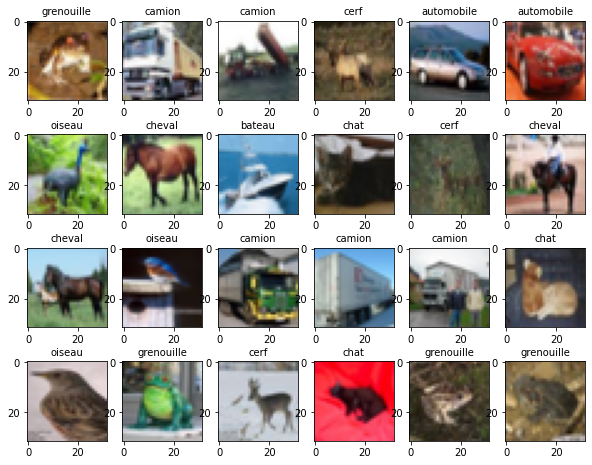

In [79]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
print("TensorFlow version:",tf.__version__)
import keras
print("Keras version:",keras.__version__)

# Importer le jeu de données CIFAR-10
from keras.datasets import cifar10

dic_noms_classe = { 
    0 : "avion",
    1 : "automobile",
    2 : "oiseau",
    3 : "chat",
    4 : "cerf",
    5 : "chien",
    6 : "grenouille",
    7 : "cheval",
    8 : "bateau",
    9 : "camion",
}

# Lire le jeu de données CIFAR-10 et le diviser entre
# les données d'entrainement et les données de test
(attributs_entrainement, classes_cibles_entrainement), (attributs_test, classes_cibles_test) = cifar10.load_data()

# résumé des données 
print()
print('Entraînement: attributs=%s, classes-cibles=%s' % (attributs_entrainement.shape, classes_cibles_entrainement.shape))
print('Test: attributs=%s, classes-cibles=%s' % (attributs_test.shape, classes_cibles_test.shape))

# Afficher les 24 premières images
print()
print("Quelques images avec leur étiquette de classe-cible...")
%matplotlib inline
# définir lagrill d'affichage des images
fig, axes = plt.subplots(nrows=4,ncols=6,figsize=(10,8))
for i_rangee in range(0,4):
    for i_colonne in range(0,6):
        axes[i_rangee,i_colonne].set_title(dic_noms_classe[int(classes_cibles_entrainement[i_rangee*6+i_colonne])],
                                           fontsize=10)
        axes[i_rangee,i_colonne].imshow(attributs_entrainement[i_rangee*6+i_colonne])
plt.show()

In [80]:
# Conversion des classes-cibles en vecteurs binaires à un bit discriminant
from keras.utils import to_categorical

classes_cibles_entrainement = to_categorical(classes_cibles_entrainement)
classes_cibles_test = to_categorical(classes_cibles_test)

# Normalisation

def normalisation(entrainement, test):
    # convertir de nombres entiers à nombres décimaux
    entrainement_normalise = entrainement.astype('float32')
    test_normalise = test.astype('float32')
    # normalisation à un nombre entre 0 et 1
    entrainement_normalise = entrainement_normalise / 255.0
    test_normalise = test_normalise / 255.0
    return entrainement_normalise, test_normalise

attributs_entrainement, attributs_test = normalisation(attributs_entrainement, attributs_test)

print("Normalisation terminée!")

Normalisation terminée!


## Modèle de base

In [99]:
## Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création d'un modèle de base...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10

modele_de_base = Sequential()
# Apprentissage et extraction des attributs
modele_de_base.add(Conv2D(32, 
                          kernel_size=(3,3),
                          activation='relu',
#                          kernel_initializer='he_uniform'))
                          kernel_initializer='glorot_uniform',
                          padding='same',
                          strides=(1,1),
                          input_shape=input_shape))
modele_de_base.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
# Classificateur perceptron multicouche
modele_de_base.add(Flatten())
modele_de_base.add(Dense(128,
                         activation='relu'))
modele_de_base.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle de base:")
modele_de_base.summary()

Création d'un modèle de base...

Description du modèle de base:
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Compilation du modèle

print()
print("Compilation du modèle de base...")

modele_de_base.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle de base...


In [101]:
# Entraînement du modèle

print()
print("Entraînement du modèle de base...")

batch_size = 128
epochs = 15

traces_entrainement = modele_de_base.fit(attributs_entrainement,
                                         classes_cibles_entrainement,
                                         batch_size=batch_size,
                                         epochs=epochs,
                                         validation_split=0.1)


Entraînement du modèle de base...
Epoch 1/15
352/352 [==============================] - 26s 71ms/step - loss: 1.8935 - accuracy: 0.3270 - val_loss: 1.3781 - val_accuracy: 0.5270
Epoch 2/15
352/352 [==============================] - 22s 62ms/step - loss: 1.3177 - accuracy: 0.5357 - val_loss: 1.2475 - val_accuracy: 0.5678
Epoch 3/15
352/352 [==============================] - 22s 62ms/step - loss: 1.1691 - accuracy: 0.5922 - val_loss: 1.1630 - val_accuracy: 0.5986
Epoch 4/15
352/352 [==============================] - 23s 64ms/step - loss: 1.0691 - accuracy: 0.6264 - val_loss: 1.0953 - val_accuracy: 0.6236
Epoch 5/15
352/352 [==============================] - 23s 66ms/step - loss: 1.0148 - accuracy: 0.6492 - val_loss: 1.1065 - val_accuracy: 0.6114
Epoch 6/15
352/352 [==============================] - 26s 74ms/step - loss: 0.9643 - accuracy: 0.6635 - val_loss: 1.0657 - val_accuracy: 0.6316
Epoch 7/15
352/352 [==============================] - 26s 74ms/step - loss: 0.9089 - accuracy: 0.6843

In [106]:
# Évaluation du modèle
print()
print("Évaluation du modèle de base...")

resultats = modele_de_base.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle de base...
Exactitude test: 65.33%


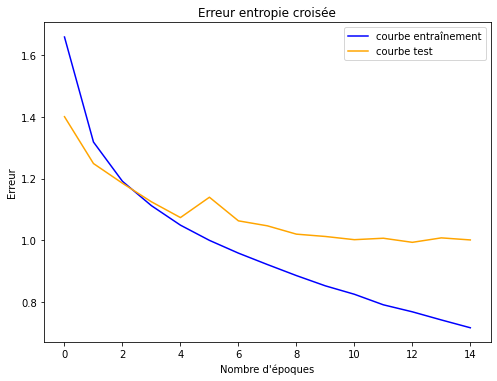

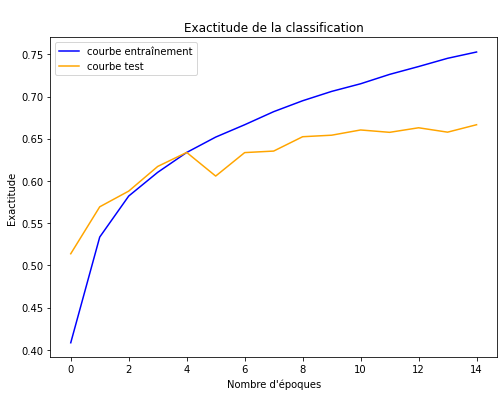

In [89]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# Sauvegarde du graphique en format .png
# nom_graphique = "modele_de_base-courbes_entraînement.png"
# plt.savefig(nom_graphique)
# plt.close()

## Modèle 2 fois plus profond

In [32]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création d'un modèle 2 fois plus profond...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10

modele_2X_plus_profond = Sequential()
# Apprentissage et extraction des attributs
modele_2X_plus_profond.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_2X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))
modele_2X_plus_profond.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_2X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_2X_plus_profond.add(Flatten())
modele_2X_plus_profond.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_2X_plus_profond.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 2 fois plus profond:")
modele_2X_plus_profond.summary()

Création d'un modèle 2 fois plus profond...

Description du modèle 2 fois plus profond:
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               524416    
________________________________

In [33]:
# Compilation du modèle

print()
print("Compilation du modèle 2 fois plus profond...")

modele_2X_plus_profond.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 2 fois plus profond...


In [34]:
# Entraînement du modèle

print()
print("Entraînement du modèle 2 fois plus profond...")

batch_size = 128
epochs = 15

traces_entrainement = modele_2X_plus_profond.fit(attributs_entrainement,
                                                 classes_cibles_entrainement,
                                                 batch_size=batch_size,
                                                 epochs=epochs,
                                                 validation_split=0.1)


Entraînement du modèle 2 fois plus profond...
Epoch 1/15
352/352 [==============================] - 72s 200ms/step - loss: 1.7390 - accuracy: 0.3748 - val_loss: 1.1759 - val_accuracy: 0.5992
Epoch 2/15
352/352 [==============================] - 64s 180ms/step - loss: 1.1438 - accuracy: 0.6013 - val_loss: 1.0481 - val_accuracy: 0.6308
Epoch 3/15
352/352 [==============================] - 62s 178ms/step - loss: 0.9755 - accuracy: 0.6634 - val_loss: 0.9463 - val_accuracy: 0.6790
Epoch 4/15
352/352 [==============================] - 69s 196ms/step - loss: 0.8773 - accuracy: 0.6939 - val_loss: 0.9285 - val_accuracy: 0.6858
Epoch 5/15
352/352 [==============================] - 62s 176ms/step - loss: 0.8040 - accuracy: 0.7229 - val_loss: 0.9064 - val_accuracy: 0.6902
Epoch 6/15
352/352 [==============================] - 63s 179ms/step - loss: 0.7458 - accuracy: 0.7404 - val_loss: 0.9051 - val_accuracy: 0.6972
Epoch 7/15
352/352 [==============================] - 64s 182ms/step - loss: 0.6808

In [35]:
# Évaluation du modèle

print()
print("Évaluation du modèle 2 fois plus profond...")

resultats = modele_2X_plus_profond.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 2 fois plus profond...
Exactitude test: 69.79%


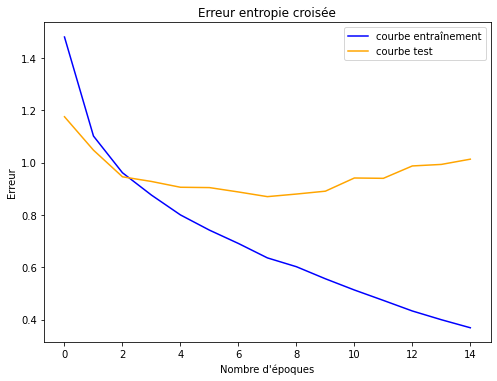

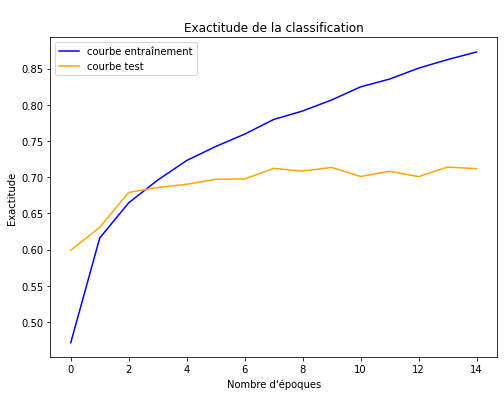

In [36]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond

In [37]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création du modèle 3 fois plus profond...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10

modele_3X_plus_profond = Sequential()
# Apprentissage et extraction des attributs
modele_3X_plus_profond.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_3X_plus_profond.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_3X_plus_profond.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_3X_plus_profond.add(Flatten())
modele_3X_plus_profond.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_3X_plus_profond.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond:")
modele_3X_plus_profond.summary()

Création du modèle 3 fois plus profond...

Description du modèle 3 fois plus profond:
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)         0         
__________________________________

In [38]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond...")

modele_3X_plus_profond.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond...


In [39]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3X_plus_profond.fit(attributs_entrainement,
                                                 classes_cibles_entrainement,
                                                 batch_size=batch_size,
                                                 epochs=epochs,
                                                 validation_split=0.1)


Entraînement du modèle 3 fois plus profond...
Epoch 1/15
352/352 [==============================] - 91s 255ms/step - loss: 1.9357 - accuracy: 0.3218 - val_loss: 1.3177 - val_accuracy: 0.5248
Epoch 2/15
352/352 [==============================] - 94s 268ms/step - loss: 1.2235 - accuracy: 0.5649 - val_loss: 1.0724 - val_accuracy: 0.6286
Epoch 3/15
352/352 [==============================] - 87s 248ms/step - loss: 1.0160 - accuracy: 0.6452 - val_loss: 0.9702 - val_accuracy: 0.6636
Epoch 4/15
352/352 [==============================] - 91s 260ms/step - loss: 0.8744 - accuracy: 0.6953 - val_loss: 0.8821 - val_accuracy: 0.6976
Epoch 5/15
352/352 [==============================] - 92s 260ms/step - loss: 0.7690 - accuracy: 0.7337 - val_loss: 0.8647 - val_accuracy: 0.7056
Epoch 6/15
352/352 [==============================] - 86s 245ms/step - loss: 0.6876 - accuracy: 0.7618 - val_loss: 0.8664 - val_accuracy: 0.7020
Epoch 7/15
352/352 [==============================] - 89s 252ms/step - loss: 0.6275

In [40]:
# Évaluation du modèle

print()
print("Évaluation du modèle 3 fois plus profond...")

resultats = modele_3X_plus_profond.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 3 fois plus profond...
Exactitude test: 71.45%


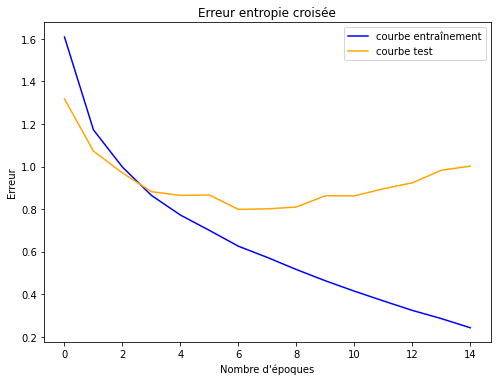

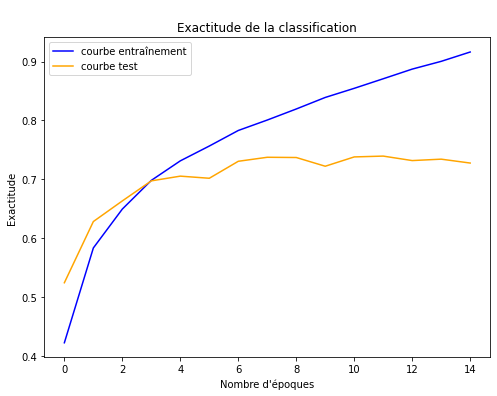

In [41]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 4 fois plus profond

In [42]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création du modèle 4 fois plus profond...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10

modele_4X_plus_profond = Sequential()
# Apprentissage et extraction des attributs
modele_4X_plus_profond.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_4X_plus_profond.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_4X_plus_profond.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_4X_plus_profond.add(Conv2D(256,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_4X_plus_profond.add(Flatten())
modele_4X_plus_profond.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_4X_plus_profond.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 4 fois plus profond:")
modele_4X_plus_profond.summary()

Création du modèle 4 fois plus profond...

Description du modèle 4 fois plus profond:
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 128)         0         
__________________________________

In [43]:
# Compilation du modèle

print()
print("Compilation du modèle 4 fois plus profond...")

modele_4X_plus_profond.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 4 fois plus profond...


In [44]:
# Entraînement du modèle

print()
print("Entraînement du modèle 4 fois plus profond...")

batch_size = 128
epochs = 15

traces_entrainement = modele_4X_plus_profond.fit(attributs_entrainement,
                                                 classes_cibles_entrainement,
                                                 batch_size=batch_size,
                                                 epochs=epochs,
                                                 validation_split=0.1)


Entraînement du modèle 4 fois plus profond...
Epoch 1/15
352/352 [==============================] - 135s 380ms/step - loss: 1.8824 - accuracy: 0.3305 - val_loss: 1.1792 - val_accuracy: 0.5830
Epoch 2/15
352/352 [==============================] - 132s 374ms/step - loss: 1.1204 - accuracy: 0.6040 - val_loss: 0.9954 - val_accuracy: 0.6540
Epoch 3/15
352/352 [==============================] - 133s 377ms/step - loss: 0.8944 - accuracy: 0.6855 - val_loss: 0.8507 - val_accuracy: 0.7010
Epoch 4/15
352/352 [==============================] - 138s 391ms/step - loss: 0.7551 - accuracy: 0.7350 - val_loss: 0.8087 - val_accuracy: 0.7226
Epoch 5/15
352/352 [==============================] - 131s 371ms/step - loss: 0.6358 - accuracy: 0.7808 - val_loss: 0.8042 - val_accuracy: 0.7312
Epoch 6/15
352/352 [==============================] - 131s 373ms/step - loss: 0.5346 - accuracy: 0.8143 - val_loss: 0.7912 - val_accuracy: 0.7442
Epoch 7/15
352/352 [==============================] - 132s 375ms/step - loss:

In [45]:
# Évaluation du modèle

print()
print("Évaluation du modèle 4 fois plus profond...")

resultats = modele_4X_plus_profond.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 4 fois plus profond...
Exactitude test: 72.15%


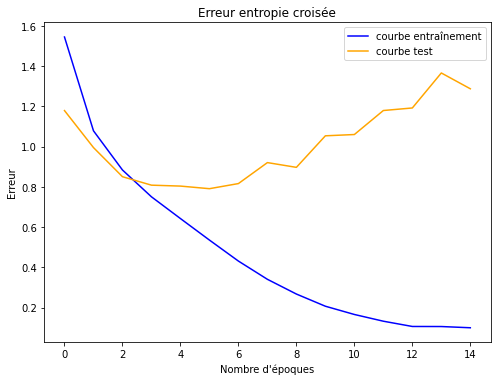

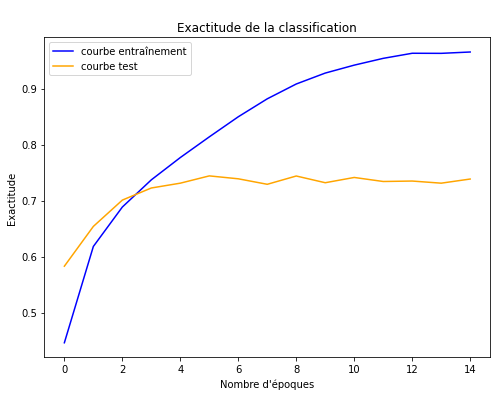

In [46]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé par extinction de neurones

In [47]:
# Construction d'un modèle de base

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

print("Création du modèle 3 fois plus profond régularisé...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10

modele_3X_plus_profond_regularise = Sequential()

# Apprentissage et extraction des attributs
modele_3X_plus_profond_regularise.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3X_plus_profond_regularise.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3X_plus_profond_regularise.add(Dropout(0.2))

modele_3X_plus_profond_regularise.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_regularise.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3X_plus_profond_regularise.add(Dropout(0.2))

modele_3X_plus_profond_regularise.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_regularise.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3X_plus_profond_regularise.add(Dropout(0.2))

# Classification des images
modele_3X_plus_profond_regularise.add(Flatten())
modele_3X_plus_profond_regularise.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_3X_plus_profond_regularise.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond régularisé:")
modele_3X_plus_profond_regularise.summary()

Création du modèle 3 fois plus profond régularisé...

Description du modèle 3 fois plus profond régularisé:
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
___________

In [48]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé...")

modele_3X_plus_profond_regularise.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond régularisé...


In [49]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3X_plus_profond_regularise.fit(attributs_entrainement,
                                                            classes_cibles_entrainement,
                                                            batch_size=batch_size,
                                                            epochs=epochs,
                                                            validation_split=0.1)


Entraînement du modèle 3 fois plus profond régularisé...
Epoch 1/15
352/352 [==============================] - 100s 279ms/step - loss: 2.0064 - accuracy: 0.2793 - val_loss: 1.4959 - val_accuracy: 0.4662
Epoch 2/15
352/352 [==============================] - 95s 271ms/step - loss: 1.3538 - accuracy: 0.5124 - val_loss: 1.1579 - val_accuracy: 0.6056
Epoch 3/15
352/352 [==============================] - 96s 272ms/step - loss: 1.1632 - accuracy: 0.5844 - val_loss: 1.0136 - val_accuracy: 0.6490
Epoch 4/15
352/352 [==============================] - 97s 276ms/step - loss: 1.0499 - accuracy: 0.6280 - val_loss: 0.9329 - val_accuracy: 0.6722
Epoch 5/15
352/352 [==============================] - 101s 288ms/step - loss: 0.9566 - accuracy: 0.6596 - val_loss: 0.8619 - val_accuracy: 0.7082
Epoch 6/15
352/352 [==============================] - 100s 284ms/step - loss: 0.8938 - accuracy: 0.6835 - val_loss: 0.7994 - val_accuracy: 0.7304
Epoch 7/15
352/352 [==============================] - 95s 271ms/step 

In [50]:
# Évaluation du modèle
print()
print("Évaluation du modèle 3 fois plus profond régularisé...")

resultats = modele_3X_plus_profond_regularise.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 3 fois plus profond régularisé...
Exactitude test: 75.82%


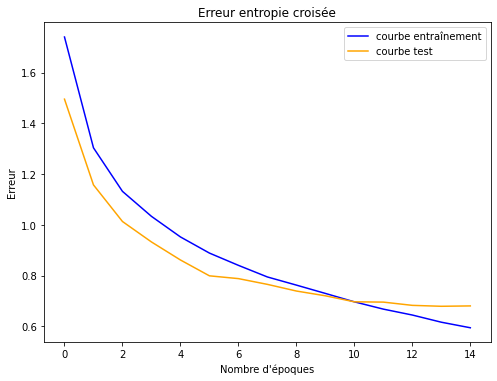

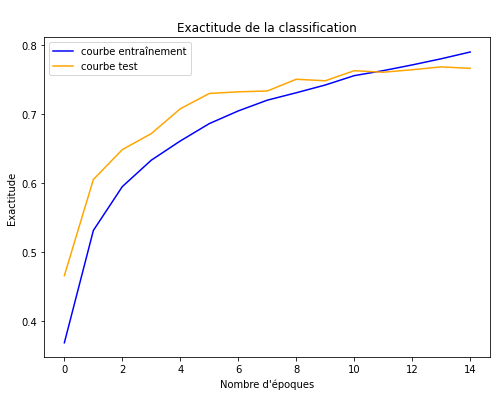

In [51]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé (L2 + extinction)


In [52]:
# Construction d'un modèle de base

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

print("Création du modèle 3 fois plus profond régularisé (L2 + extinction)...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10
diminution_poids = 0.01

modele_3Xplus_profond_regL2Xtn = Sequential()

# Apprentissage et extraction des attributs
modele_3Xplus_profond_regL2Xtn.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='elu', 
                         kernel_initializer='he_uniform',
                         kernel_regularizer=regularizers.l2(diminution_poids),
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3Xplus_profond_regL2Xtn.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3Xplus_profond_regL2Xtn.add(Dropout(0.2))

modele_3Xplus_profond_regL2Xtn.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          kernel_regularizer=regularizers.l2(diminution_poids),
                          padding='same',
                          strides=(1,1),))
modele_3Xplus_profond_regL2Xtn.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3Xplus_profond_regL2Xtn.add(Dropout(0.2))

modele_3Xplus_profond_regL2Xtn.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          kernel_regularizer=regularizers.l2(diminution_poids),
                          padding='same',
                          strides=(1,1),))
modele_3Xplus_profond_regL2Xtn.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3Xplus_profond_regL2Xtn.add(Dropout(0.2))

# Classification des images
modele_3Xplus_profond_regL2Xtn.add(Flatten())
modele_3Xplus_profond_regL2Xtn.add(Dense(128, 
                         activation='elu', 
                         kernel_initializer='he_uniform'))
modele_3Xplus_profond_regL2Xtn.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond régularisé (L2 + extinction):")
modele_3Xplus_profond_regL2Xtn.summary()

Création du modèle 3 fois plus profond régularisé (L2 + extinction)...

Description du modèle 3 fois plus profond régularisé (L2 + extinction):
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8,

In [53]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé (L2 + extinction)...")

modele_3Xplus_profond_regL2Xtn.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond régularisé (L2 + extinction)...


In [54]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé (L2 + extinction)...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3Xplus_profond_regL2Xtn.fit(attributs_entrainement,
                                                         classes_cibles_entrainement,
                                                         batch_size=batch_size,
                                                         epochs=epochs,
                                                         validation_split=0.1)


Entraînement du modèle 3 fois plus profond régularisé (L2 + extinction)...
Epoch 1/15
352/352 [==============================] - 104s 294ms/step - loss: 5.6464 - accuracy: 0.3111 - val_loss: 2.7881 - val_accuracy: 0.4706
Epoch 2/15
352/352 [==============================] - 109s 311ms/step - loss: 2.4066 - accuracy: 0.5292 - val_loss: 1.8119 - val_accuracy: 0.6048
Epoch 3/15
352/352 [==============================] - 105s 298ms/step - loss: 1.7949 - accuracy: 0.5908 - val_loss: 1.5623 - val_accuracy: 0.6434
Epoch 4/15
352/352 [==============================] - 102s 289ms/step - loss: 1.5679 - accuracy: 0.6240 - val_loss: 1.4793 - val_accuracy: 0.6392
Epoch 5/15
352/352 [==============================] - 104s 295ms/step - loss: 1.4656 - accuracy: 0.6389 - val_loss: 1.4014 - val_accuracy: 0.6566
Epoch 6/15
352/352 [==============================] - 103s 293ms/step - loss: 1.4025 - accuracy: 0.6486 - val_loss: 1.3167 - val_accuracy: 0.6738
Epoch 7/15
352/352 [============================

In [55]:
# Évaluation du modèle
print()
print("Évaluation du modèle 3 fois plus profond régularisé (L2 + extinction)...")

resultats = modele_3Xplus_profond_regL2Xtn.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 3 fois plus profond régularisé (L2 + extinction)...
Exactitude test: 70.04%


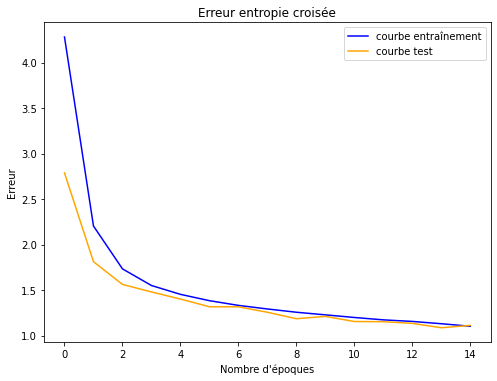

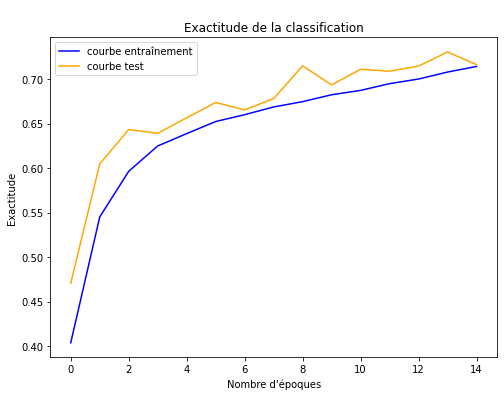

In [56]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé et normalisation des lots


In [57]:
# Construction d'un modèle de base

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

print("Création du modèle 3 fois plus profond régularisé et normalisation des lots...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_classes_cibles = 10

modele_3X_plus_profond_reg_norm = Sequential()

# Apprentissage et extraction des attributs
modele_3X_plus_profond_reg_norm.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='elu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3X_plus_profond_reg_norm.add(BatchNormalization())
modele_3X_plus_profond_reg_norm.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3X_plus_profond_reg_norm.add(Dropout(0.2))

modele_3X_plus_profond_reg_norm.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_reg_norm.add(BatchNormalization())
modele_3X_plus_profond_reg_norm.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3X_plus_profond_reg_norm.add(Dropout(0.2))

modele_3X_plus_profond_reg_norm.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_reg_norm.add(BatchNormalization())
modele_3X_plus_profond_reg_norm.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
modele_3X_plus_profond_reg_norm.add(Dropout(0.2))

# Classification des images
modele_3X_plus_profond_reg_norm.add(Flatten())
modele_3X_plus_profond_reg_norm.add(Dense(128, 
                         activation='elu', 
                         kernel_initializer='he_uniform'))
modele_3X_plus_profond_reg_norm.add(Dense(nombre_classes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond régularisé et normalisation des lots :")
modele_3X_plus_profond_reg_norm.summary()

Création du modèle 3 fois plus profond régularisé et normalisation des lots...

Description du modèle 3 fois plus profond régularisé et normalisation des lots :
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (B

In [58]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé et normalisation des lots...")

modele_3X_plus_profond_reg_norm.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond régularisé et normalisation des lots...


In [59]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé et normalisation des lots...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3X_plus_profond_reg_norm.fit(attributs_entrainement,
                                                          classes_cibles_entrainement,
                                                          batch_size=batch_size,
                                                          epochs=epochs,
                                                          validation_split=0.1)


Entraînement du modèle 3 fois plus profond régularisé et normalisation des lots...
Epoch 1/15
352/352 [==============================] - 138s 390ms/step - loss: 1.9809 - accuracy: 0.3731 - val_loss: 1.6531 - val_accuracy: 0.4508
Epoch 2/15
352/352 [==============================] - 137s 389ms/step - loss: 1.2013 - accuracy: 0.5657 - val_loss: 1.1975 - val_accuracy: 0.5876
Epoch 3/15
352/352 [==============================] - 135s 384ms/step - loss: 1.0090 - accuracy: 0.6444 - val_loss: 1.1883 - val_accuracy: 0.6162
Epoch 4/15
352/352 [==============================] - 136s 385ms/step - loss: 0.8872 - accuracy: 0.6839 - val_loss: 0.8954 - val_accuracy: 0.6958
Epoch 5/15
352/352 [==============================] - 135s 383ms/step - loss: 0.7791 - accuracy: 0.7267 - val_loss: 0.8746 - val_accuracy: 0.7016
Epoch 6/15
352/352 [==============================] - 145s 413ms/step - loss: 0.7159 - accuracy: 0.7477 - val_loss: 0.8485 - val_accuracy: 0.7216
Epoch 7/15
352/352 [====================

In [60]:
# Évaluation du modèle
print()
print("Évaluation du modèle 3 fois plus profond régularisé et normalisation des lots...")

resultats = modele_3X_plus_profond_reg_norm.evaluate(attributs_test, classes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 3 fois plus profond régularisé et normalisation des lots...
Exactitude test: 75.88%


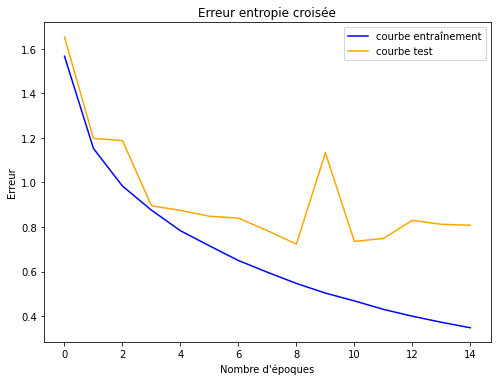

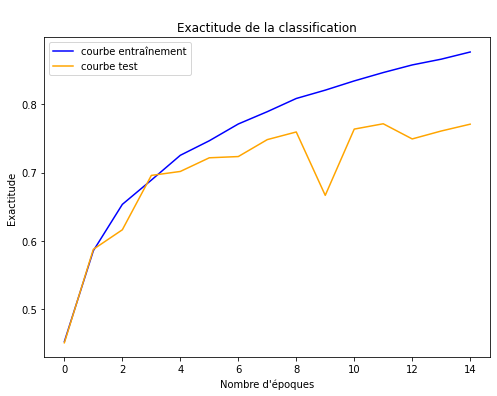

In [61]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé avec amplification de données

In [62]:
# Amplification des données

from keras.preprocessing.image import ImageDataGenerator

# créer un générateur d'images
generateur_images = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       horizontal_flip=True)

# créer un itérateur sur les images
iterateur_images = generateur_images.flow(attributs_entrainement,
                                          classes_cibles_entrainement,
                                          batch_size=64)

In [63]:
print()
print("Description du modèle plus profond régularisé et normalisation des lots:")
modele_3X_plus_profond_regularise.summary()


Description du modèle plus profond régularisé et normalisation des lots:
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_____________________________________________

In [64]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé avec données amplifiées...")

modele_3X_plus_profond_regularise.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond régularisé avec données amplifiées...


In [65]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé avec données amplifiées...")

epochs = 125

nombre_etapes_par_epoque = int(attributs_entrainement.shape[0] / 64)
traces_entrainement = modele_3X_plus_profond_regularise.fit_generator(iterateur_images,
                                                                      steps_per_epoch=nombre_etapes_par_epoque,
                                                                      epochs=epochs,
                                                                      validation_data=(attributs_test, classes_cibles_test),
                                                                      verbose=1)                                           


Entraînement du modèle 3 fois plus profond régularisé avec données amplifiées...
Epoch 1/125


/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 139s 176ms/step - loss: 0.9092 - accuracy: 0.6843 - val_loss: 0.7677 - val_accuracy: 0.7360
Epoch 2/125
781/781 [==============================] - 131s 167ms/step - loss: 0.8497 - accuracy: 0.6989 - val_loss: 0.7364 - val_accuracy: 0.7473
Epoch 3/125
781/781 [==============================] - 132s 169ms/step - loss: 0.8376 - accuracy: 0.7103 - val_loss: 0.7721 - val_accuracy: 0.7352
Epoch 4/125
781/781 [==============================] - 129s 165ms/step - loss: 0.8094 - accuracy: 0.7163 - val_loss: 0.7341 - val_accuracy: 0.7507
Epoch 5/125
781/781 [==============================] - 128s 164ms/step - loss: 0.8052 - accuracy: 0.7181 - val_loss: 0.7109 - val_accuracy: 0.7563
Epoch 6/125
781/781 [==============================] - 133s 170ms/step - loss: 0.7760 - accuracy: 0.7293 - val_loss: 0.6948 - val_accuracy: 0.7618
Epoch 7/125
781/781 [==============================] - 128s 163ms/step - loss: 0.7661 - accuracy: 0.7322 - val_loss: 0.6937 - val_

781/781 [==============================] - 139s 178ms/step - loss: 0.4893 - accuracy: 0.8293 - val_loss: 0.5621 - val_accuracy: 0.8187
Epoch 112/125
781/781 [==============================] - 131s 168ms/step - loss: 0.4906 - accuracy: 0.8289 - val_loss: 0.5377 - val_accuracy: 0.8237
Epoch 113/125
781/781 [==============================] - 135s 172ms/step - loss: 0.4867 - accuracy: 0.8305 - val_loss: 0.5532 - val_accuracy: 0.8193
Epoch 114/125
781/781 [==============================] - 132s 169ms/step - loss: 0.4962 - accuracy: 0.8289 - val_loss: 0.5354 - val_accuracy: 0.8246
Epoch 115/125
781/781 [==============================] - 139s 178ms/step - loss: 0.4885 - accuracy: 0.8292 - val_loss: 0.6117 - val_accuracy: 0.8073
Epoch 116/125
781/781 [==============================] - 128s 164ms/step - loss: 0.5011 - accuracy: 0.8254 - val_loss: 0.5117 - val_accuracy: 0.8289
Epoch 117/125
781/781 [==============================] - 129s 165ms/step - loss: 0.4873 - accuracy: 0.8303 - val_loss: 0

In [66]:
# Évaluation du modèle

print()
print("Évaluation du modèle plus profond régularisé avec données amplifiées...")
resultats = modele_3X_plus_profond_regularise.evaluate(attributs_test,
                                                        classes_cibles_test,
                                                        verbose=1)
print("Exactitude test: {:.2f}%".format(resultats[1]*100.0))


Évaluation du modèle plus profond régularisé avec données amplifiées...
313/313 [==============================] - 5s 16ms/step - loss: 0.5398 - accuracy: 0.8230
Exactitude test: 82.30%


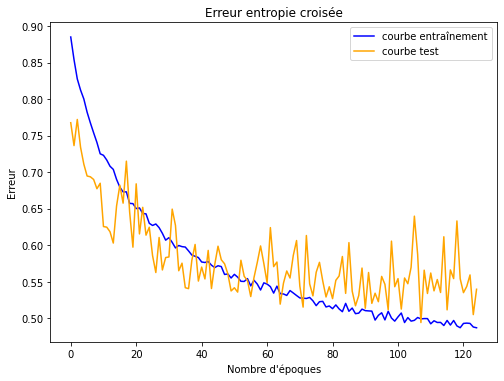

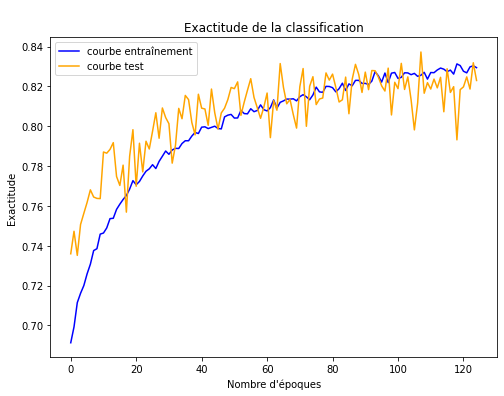

In [67]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

In [68]:
print("IPython Notebook exécution terminée!")


IPython Notebook exécution terminée!


In [103]:
# https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
import numpy as np
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

weight_decay = 1e-4
model = Sequential()
# Couche convolutive 1
model.add(Conv2D(32, 
                 (3,3), 
                 padding='same', 
                 kernel_regularizer=regularizers.l2(weight_decay), 
                 input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())

# Couche convolutive 2
model.add(Conv2D(32, 
                 (3,3), 
                 padding='same', 
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
model.add(Dropout(0.2))
 
# Couche convolutive 3
model.add(Conv2D(64, 
                 (3,3),
                 padding='same', 
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

# Couche convolutive 4
model.add(Conv2D(64, 
                 (3,3), 
                 padding='same', 
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
model.add(Dropout(0.3))

# Couche convolutive 5
model.add(Conv2D(128,
                 (3,3),
                 padding='same', 
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

# Couche convolutive 6
model.add(Conv2D(128, 
                 (3,3), 
                 padding='same', 
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# Régularisation par extinction de neurones (dropout) 
model.add(Dropout(0.4))

# Classificateur perceptron multicouche
model.add(Flatten())
model.add(Dense(128,
                activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
traces_entrainement = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))
# Test: 89.000 loss: 0.440 (1 seule couche cachée en sortie, 125 époques)
# Test: 89.350 loss: 0.436 (2 couches cachées en sortie, 125 époques)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 32)      

Epoch 30/125
781/781 [==============================] - 404s 517ms/step - loss: 0.6632 - accuracy: 0.8274 - val_loss: 0.6793 - val_accuracy: 0.8314
Epoch 31/125
781/781 [==============================] - 400s 512ms/step - loss: 0.6521 - accuracy: 0.8286 - val_loss: 0.6244 - val_accuracy: 0.8462
Epoch 32/125
781/781 [==============================] - 401s 514ms/step - loss: 0.6451 - accuracy: 0.8334 - val_loss: 0.6098 - val_accuracy: 0.8482
Epoch 33/125
781/781 [==============================] - 404s 517ms/step - loss: 0.6444 - accuracy: 0.8315 - val_loss: 0.6470 - val_accuracy: 0.8358
Epoch 34/125
781/781 [==============================] - 404s 517ms/step - loss: 0.6541 - accuracy: 0.8297 - val_loss: 0.6719 - val_accuracy: 0.8352
Epoch 35/125
781/781 [==============================] - 399s 510ms/step - loss: 0.6359 - accuracy: 0.8335 - val_loss: 0.5857 - val_accuracy: 0.8544
Epoch 36/125
781/781 [==============================] - 402s 515ms/step - loss: 0.6377 - accuracy: 0.8331 - val_

781/781 [==============================] - 466s 596ms/step - loss: 0.4904 - accuracy: 0.8781 - val_loss: 0.5199 - val_accuracy: 0.8791
Epoch 86/125
781/781 [==============================] - 461s 589ms/step - loss: 0.4870 - accuracy: 0.8800 - val_loss: 0.5337 - val_accuracy: 0.8758
Epoch 87/125
781/781 [==============================] - 439s 562ms/step - loss: 0.4865 - accuracy: 0.8762 - val_loss: 0.5657 - val_accuracy: 0.8679
Epoch 88/125
781/781 [==============================] - 364s 466ms/step - loss: 0.4788 - accuracy: 0.8785 - val_loss: 0.5220 - val_accuracy: 0.8741
Epoch 89/125
781/781 [==============================] - 362s 463ms/step - loss: 0.4746 - accuracy: 0.8824 - val_loss: 0.5211 - val_accuracy: 0.8786
Epoch 90/125
781/781 [==============================] - 366s 468ms/step - loss: 0.4717 - accuracy: 0.8822 - val_loss: 0.5950 - val_accuracy: 0.8670
Epoch 91/125
781/781 [==============================] - 364s 466ms/step - loss: 0.4701 - accuracy: 0.8825 - val_loss: 0.5065 

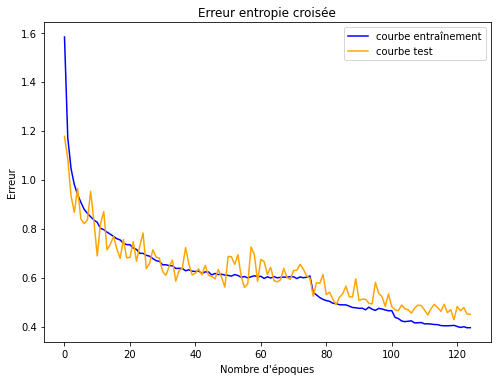

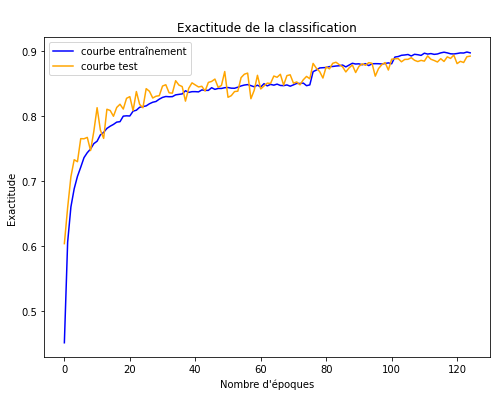

In [104]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

In [105]:
print("Carnet IPython exécution terminée!")


Carnet IPython exécution terminée!
